## This is a ipython notebook
To install ipython, I recommend to use the anaconda package, which takes care of everything.

## Import library as needed
These are almost needed by every single plot.

In [264]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.legend_handler as lh
import seaborn as sns

sns.set(style='ticks',palette='Set2')
sns.despine()



%matplotlib inline

## Create the sample data we are using in this file 

### Data that are originally in matrix form
Not really useful, since most of our output is in the form of a data file

In [30]:
random3D=np.random.randn(20,10,5);

### Data read from file with the position information

Here I generate a set of data manually, in real case, you may want to use pandas to read the data from file.

For example:
```python
    data = pd.read_csv("data.dat",sep='\s*',header=None,engine='python')
```
If you use excel file, pandas also have the function to import from excel
```python
    pd.read_excel
```

In [31]:
nx=20
ny=10
nz=5
#This will generate a nx by ny by nz array with z increases fastest
heat3D=np.zeros([1000,4]);
vector3D=np.zeros([1000,6]);
for i in range(1000):
    a=i%nz
    b=math.floor((i-a)/nz)%ny
    heat3D[i,2]=a+1
    heat3D[i,1]=b+1
    heat3D[i,0]=math.floor(i/(ny*nz))+1
    heat3D[i,3]=np.random.rand()
    vector3D[i,3]=np.random.rand()
    vector3D[i,4]=np.random.rand()
    vector3D[i,5]=np.random.rand()

df_heat3D=pd.DataFrame(heat3D,columns=['x','y','z','val']);
df_vector3D=pd.DataFrame(vector3D,columns=['x','y','z','px','py','pz'])
df_vector3D[['x','y','z']]=df_heat3D[['x','y','z']]

Now we have the data, we would like to slice it into 2D, suppose we want to slice the top surface data out.

In [32]:
df_heat2D=df_heat3D[df_heat3D['z']==5][['x','y','val']];
df_heat2D.head(5)

,x,y,val
4,1,1,0.717875
9,1,2,0.738253
14,1,3,0.601578
19,1,4,0.519353
24,1,5,0.604795


In [33]:
df_vector2D=df_vector3D.loc[df_vector3D['z']==5,['x','y','px','py']];
df_vector2D.head(5)

,x,y,px,py
4,1,1,0.007523,0.169494
9,1,2,0.744653,0.984368
14,1,3,0.372119,0.377931
19,1,4,0.723150,0.443634
24,1,5,0.912124,0.813673


## Make a heat plot 

We need to trasform the data into a two dimensional data array in order to make the heat plot. First use the values attribute of pandas dataframe to transform it into a numpy array, then use the reshape function to do the conversion.

In [34]:
heat2D=df_heat2D['val'].values.reshape(nx,ny)

In [35]:
heat2D.shape

(20, 10)

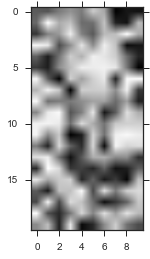

In [36]:
plt.imshow(heat2D)

You can see this is a bit not as we are expected. Generally, we want the origin to be in the left bottom corner, while x axis is the horizontal and y is the vertical axis. The reason imshow give us such result is due to our matrix is in such shape, imshow simply map each element in the array to a color at their own position.

To get what we want we can transpose the matrix.

In [37]:
heat2D=heat2D.transpose();heat2D.shape

(10, 20)

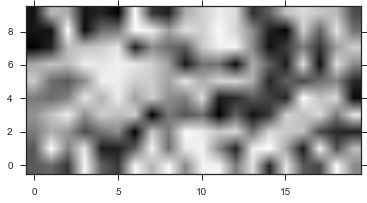

In [38]:
plt.imshow(heat2D,origin='lower')

Whenever heat plot is used, we always want to set the x-y aspect ratio to be equal, meaning 1 unit in the x is the same as 1 unit in y direction.

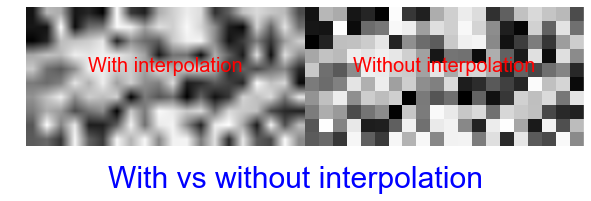

In [358]:
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(wspace=0,hspace=0)

plt.suptitle('With vs without interpolation',x=0.5,y=0.1,fontsize=30,color='blue')

plt.subplot(121)
plt.title('With interpolation',fontsize=20,x=0.5,y=0.5,color='red')
plt.imshow(heat2D,origin='lower')
plt.gca().set_aspect('equal',adjustable='box')
plt.axis('off')

plt.subplot(122)
plt.title('Without interpolation',fontsize=20,x=0.5,y=0.5,color='red')
plt.imshow(heat2D,origin='lower', interpolation='none')
plt.gca().set_aspect('equal',adjustable='box')
plt.axis('off')

plt.savefig('output1.png',dpi=300)

## Make a vector plot 

Using matplotlib's method quiver to to the job. But one problem with vector plot is that, if you show every vector in the dataset, the very likely things wil become messy. So we need to first sample some data from the fullset.

In [40]:
sample_rate=0.2
sampled_vector2D=df_vector2D.sample(int(nx*ny*sample_rate))

In [106]:
X=sampled_vector2D[['x']]
Y=sampled_vector2D[['y']]
U=sampled_vector2D[['px']]
V=sampled_vector2D[['py']]
C=(X.values**2+Y.values**2)**0.5

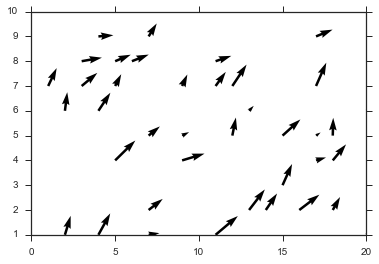

In [108]:
plt.quiver(X,Y,U,V)

<function matplotlib.pyplot.tight_layout>

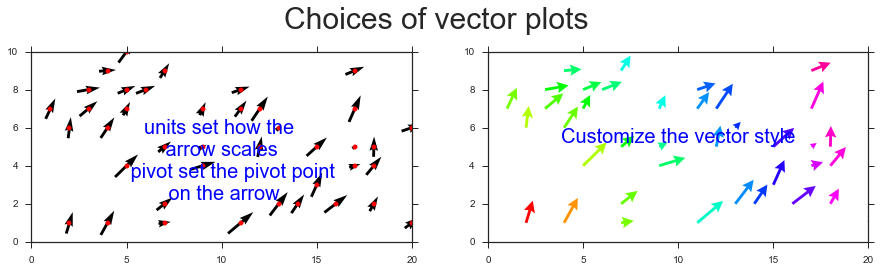

In [113]:
plt.figure(figsize=(15,4))
plt.suptitle('Choices of vector plots',fontsize=30,x=0.5,y=1)
plt.subplot(121)
plt.title("units set how the \n arrow scales \n \
    pivot set the pivot point \n on the arrow",x=0.5,y=0.2,fontsize=20,color='blue')
plt.xlim([0,20])
plt.ylim([0,10])
plt.quiver(X,Y,U,V,units='xy',pivot='mid',color='black')
plt.scatter(X,Y,color='red')
plt.gca().set_aspect('equal',adjustable='box')

plt.subplot(122)
plt.xlim([0,20])
plt.ylim([0,10])
plt.quiver(X,Y,U,V,C,units='xy',cmap='hsv',scale=0.7,width=0.15,headwidth=4,headlength=4,headaxislength=3.5)
plt.title("Customize the vector style",x=0.5,y=0.5,fontsize=20,color='blue')
plt.gca().set_aspect('equal',adjustable='box')

plt.tight_layout


## Combine heat and vector together 

Lay one type of figure on top of another is simple. Just call them one by one, first imshow() for heat plot, then quiver() for the vector plot.

(0.0, 20.0, 0.0, 10.0)

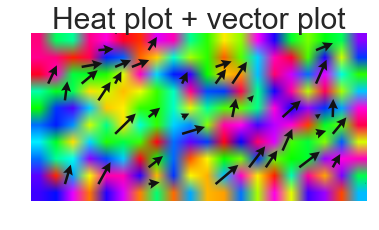

In [115]:
plt.imshow(heat2D,origin='lower',extent=[0,nx,0,ny],cmap='hsv',vmin=0,vmax=1)
plt.quiver(X,Y,U,V,units='xy',color='#121212',scale=0.7,width=0.15,headwidth=4,headlength=4,headaxislength=3.5)
plt.gca().set_aspect('equal',adjustable='box')
plt.title("Heat plot + vector plot",fontsize=30,x=0.5,y=1)
plt.axis("off")

## Polar plot 

Using the polar axis could be achieved by passing one keyword when calling the subplot() method
```
polar=True
```

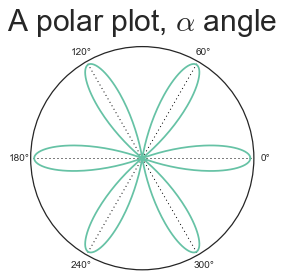

In [306]:
#Generate some data to plot with first
x = np.linspace(0, 2 * np.pi, 1000)
plt.subplot(111, polar=True)
plt.plot(x, 1 + 2 * np.cos(6 * x))
plt.yticks([])
plt.xlim(-.1, 3.1)
plt.ylim(-.1, 3.1)
plt.xticks(np.linspace(0, 5 * np.pi / 3, 6))
plt.title(r"A polar plot, $\alpha$ angle",fontsize=30)
plt.grid(color='k', linewidth=1, linestyle=':')

## Normal scatter point plot and plot with two y axis

We can type latex style math equations like this.
```
plt.title(r"$\alpha$")
```

Notice there is a r before the string, and then within the quotation mark you'll be able to use normal latex commands.

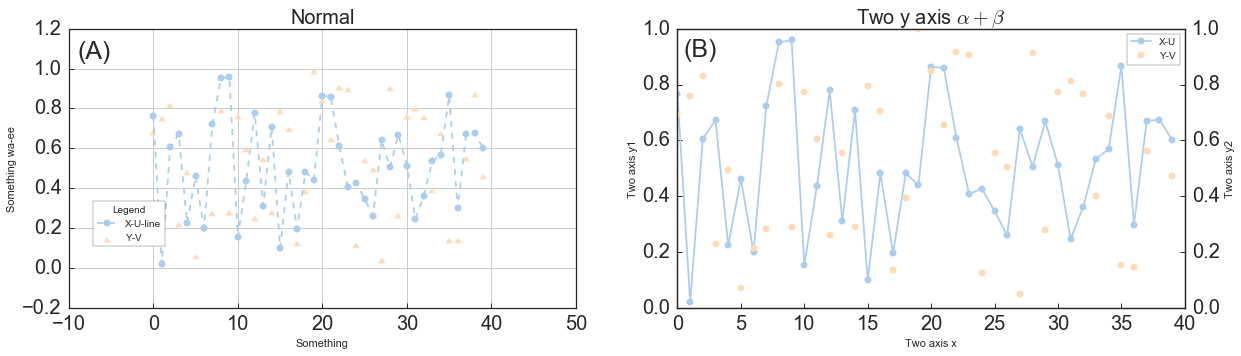

In [356]:
#First sort the data in
x1=pd.DataFrame(range(0,U.size))
x2=pd.DataFrame(range(0,V.size))
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(x1,U,'o--',color='#abcdef',label='X-U-line')
plt.scatter(x2,V,color='#fedcba',marker=6,s=50,label='Y-V')
plt.legend(bbox_to_anchor=(0.2,0.4),markerfirst=True,frameon=True,title='Legend')
plt.tick_params(axis='both',direction='in',top='off',right='off',length=5,labelsize=20)
plt.title('Normal',fontsize=20)
plt.text(-9,1.05,'(A)',fontsize=25)
plt.xlabel('Something')
plt.ylabel('Something wa-ee')
plt.grid(True)

ax1=plt.subplot(122)
ax1.plot(x1,U,'o-',color='#abcdef',label='X-U')
ax2=ax1.twinx()
ax2.plot(x2,V,'o',linestyle='none',color='#fedcba',label='Y-V')
#get the handles for both plots and put them into one legend
h1,l1=ax1.get_legend_handles_labels()
h2,l2=ax2.get_legend_handles_labels()
handle=h1+h2
plt.legend(handles=handle,frameon=True)

ax1.set_xlabel('Two axis x')
ax1.set_ylabel('Two axis y1')
ax2.set_ylabel('Two axis y2')
ax1.tick_params(axis='both',direction='in',top='off',length=5,labelsize=20)
ax2.tick_params(axis='both',direction='in',top='off',length=5,labelsize=20)
plt.title(r'Two y axis $\alpha+\beta$',fontsize=20)
plt.text(0.5,0.9,'(B)',fontsize=25)


## Miniplot within another figure

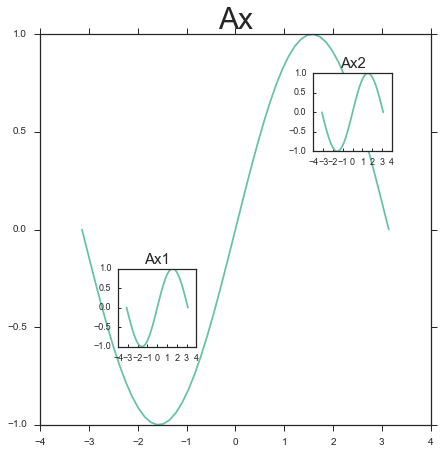

In [361]:
#rect should be like this [x_position_of_lower_left_corner,y_position_of_lower_left_corner,width,height]

def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5*2
    y_labelsize *= rect[3]**0.5*2
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    subax.tick_params(top='off',right='off',direction='in',length=3)
    return subax


plt.figure(figsize=(7,7))
ax = plt.subplot(111)
rect1 = [0.2,0.2,0.2,0.2]
rect2 = [0.7,0.7,0.2,0.2]
ax1 = add_subplot_axes(ax,rect1)
ax2 = add_subplot_axes(ax,rect2)
x = np.linspace(-np.pi,np.pi)
ax.plot()
ax.plot(x,np.sin(x))
ax1.plot(x,np.sin(x))
ax2.plot(x,np.sin(x))
ax.set_title("Ax",fontsize=30)
ax1.set_title("Ax1",fontsize=15)
ax2.set_title("Ax2",fontsize=15)

## Save a figure 

Save a figure is easy.
```python
plt.savefig('output1.png',dpi=300)
```

## Online example of using matplotlibs

[All Gallery](http://matplotlib.org/gallery.html) \\
[Colormaps](http://matplotlib.org/examples/color/colormaps_reference.html) \\
[Legend guide](http://matplotlib.org/users/legend_guide.html#plotting-guide-legend)\\
[Quiver demo](http://matplotlib.org/examples/pylab_examples/quiver_demo.html)\\
[Add legend for the twin y axis case](http://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend)\\
[Minifigure with another figure](http://stackoverflow.com/questions/17458580/embedding-small-plots-inside-subplots-in-matplotlib)\\
